# Classificação dos dígitos 1x5;

### Importando Bibliotecas

In [17]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

### Exibindo os resultados dos arquivos reduzidos

*' train_redu.cs'*v e*' test_redu.cs'*  contém 3 as seguintes colunas: label 
intensidade e simetria

In [18]:
#primeiros resultados arq de treino
df_train_redu = pd.read_csv('dataset_digits/train_redu.csv', delimiter=';')
print("Primeiras linhas do arquivo train_redu.csv:")
print(df_train_redu.head())

#primeiros resultados arq de teste
df_test_redu = pd.read_csv('dataset_digits/test_redu.csv', delimiter=';')
print("\nPrimeiras linhas do arquivo test_redu.csv:")
print(df_test_redu.head())

Primeiras linhas do arquivo train_redu.csv:
   label  intensidade    simetria
0      0   145.435294  148.572549
1      0   118.576471  137.113725
2      0   127.600000  134.047059
3      0   138.047059  151.003922
4      0   146.215686  122.501961

Primeiras linhas do arquivo test_redu.csv:
   label  intensidade    simetria
0      0   147.933333  130.470588
1      0   131.054902  122.721569
2      0   134.890196  151.725490
3      0   139.976471  133.921569
4      0   129.580392  130.274510


### Separando Train1x5 e Test1x5 

Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando 
apenas as imagens com valores 1 ou 5 na coluna label, construindo as instância *
train1*x5 *e test1*x5;

In [19]:
train1x5 = df_train_redu[(df_train_redu['label'] == 1) | (df_train_redu['label'] == 5)]
test1x5 = df_test_redu[(df_test_redu['label'] == 1) | (df_test_redu['label'] == 5)]

print(f"train1x5: {train1x5}")

train1x5:       label  intensidade    simetria
425       1    44.701961   69.270588
426       1    59.850980   83.443137
427       1    48.552941   79.043137
428       1    69.435294   72.878431
429       1    51.541176   84.611765
...     ...          ...         ...
2181      5   105.686275  133.890196
2182      5   113.050980  116.698039
2183      5   110.725490  133.019608
2184      5    99.305882  132.133333
2185      5   101.172549  141.364706

[1184 rows x 3 columns]


### Plotando os graficos dos digitos 1 e 5

Plotar os dados de train1x5 em um gráfico de duas dimensões (intensidade X 
simetria) como ilustrado na Figura 4. Dados com 𝑙𝑎𝑏𝑒𝑙 = 1 plotar de azul e dado 
com 𝑙𝑎𝑏𝑒𝑙 = 5 plotar de vermelho;

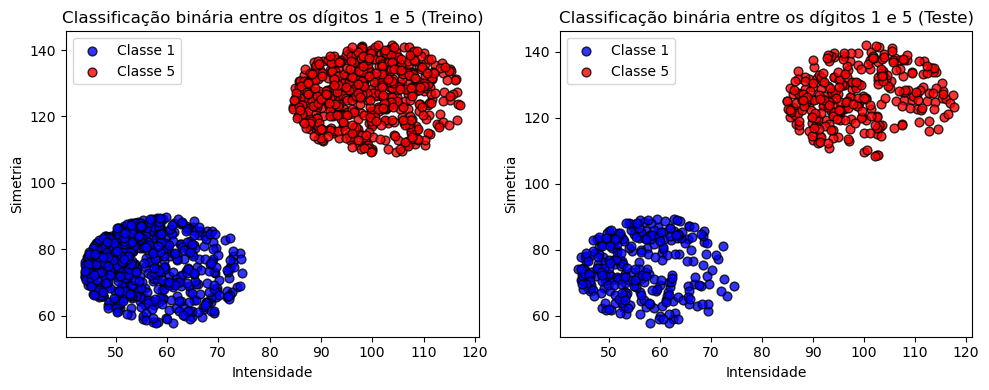

In [20]:
# Separar as classes no conjunto de treino
train1 = train1x5[train1x5['label'] == 1]
train5 = train1x5[train1x5['label'] == 5]

# Separar as classes no conjunto de teste
test1 = test1x5[test1x5['label'] == 1]
test5 = test1x5[test1x5['label'] == 5]

# Plot dos dados de treino
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # Gráfico à esquerda
plt.scatter(train1['intensidade'], train1['simetria'], color='blue', edgecolor='k', s=40, alpha=0.8, label='Classe 1')
plt.scatter(train5['intensidade'], train5['simetria'], color='red', edgecolor='k', s=40, alpha=0.8, label='Classe 5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação binária entre os dígitos 1 e 5 (Treino)')
plt.legend()

# Plot dos dados de teste
plt.subplot(1, 2, 2)  # Gráfico à direita
plt.scatter(test1['intensidade'], test1['simetria'], color='blue', edgecolor='k', s=40, alpha=0.8, label='Classe 1')
plt.scatter(test5['intensidade'], test5['simetria'], color='red', edgecolor='k', s=40, alpha=0.8, label='Classe 5')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação binária entre os dígitos 1 e 5 (Teste)')
plt.legend()

# Mostrar ambos os gráficos
plt.tight_layout()
plt.show()

In [21]:
# Aqui so estou conferindo se os distribuição de valores estão certos e equilibrados
print("distribuição das Classes no Treinamento:")
print(train1x5['label'].value_counts())

print("\nDistribuição das Classes no Teste:")
print(test1x5['label'].value_counts())

distribuição das Classes no Treinamento:
1    608
5    576
Name: label, dtype: int64

Distribuição das Classes no Teste:
1    292
5    291
Name: label, dtype: int64


### Criando X_treino, X_teste, Y_treino e Y_teste

#### Dados de Treinamento

- **Características (`X_train`)**: Seleciona as colunas `intensidade` e `simetria` do DataFrame `train1x5`.
- **Rótulos (`y_train`)**: Converte os rótulos para valores binários, onde o dígito `1` é mantido como `1` e `5` são convertidos para `-1`.

#### Dados de Teste

- **Características (`X_test`)**: Seleciona as colunas `intensidade` e `simetria` do DataFrame `test1x5`.
- **Rótulos (`y_test`)**: Converte os rótulos para valores binários, onde o dígito `1` é mantido como `1` e `5` são convertidos para `-1`.

In [22]:
# importando os modelos da pasta 'modelos'

from modelos.Perceptron import PLA, classify
from modelos.RegressaoLinear import LinearRegression
from modelos.RegressaoLogistica import LogisticRegression

In [23]:
# Separar os dados de treino e teste
X_train = train1x5[['intensidade', 'simetria']].values
y_train = train1x5['label'].apply(lambda x: 1 if x == 1 else -1).values

X_test = test1x5[['intensidade', 'simetria']].values
y_test = test1x5['label'].apply(lambda x: 1 if x == 1 else -1).values

## Análise da distribuição dos dados
   - O estudo da distribuição dos dados se faz necessário para que possamos entender a organização do nosso conjunto e aplicar métodos que podem nos ajudar no desempenho dos algoritmos 

### Distribuição Normal

- **Se os dados são normalmente distribuídos (`p_value > 0.05`), a padronização é recomendada.**
  - **Por quê?** A padronização (ou z-score normalization) é apropriada para dados que seguem uma distribuição normal, pois transforma os dados para ter uma média de 0 e um desvio padrão de 1.

### Não Distribuição Normal ou Desvio Padrão Pequeno

- **Se os dados não são normalmente distribuídos (`p_value <= 0.05`) ou têm um desvio padrão pequeno (`std_dev < 1.0`), a normalização é recomendada.**
  - **Por quê?** A normalização (ou min-max scaling) é adequada para dados que não seguem uma distribuição normal ou têm uma variação pequena, pois transforma os dados para um intervalo fixo (por exemplo, 0 a 1).

In [24]:
from scipy.stats import shapiro

def verificar_distribuicao(X, dataset_nome):
    colunas = ['intensidade', 'simetria']
    for i, coluna in enumerate(colunas):
        stat, p_value = shapiro(X[:, i])
        std_dev = np.std(X[:, i])

        print(f"\nDataset {dataset_nome} - Coluna: {coluna}")
        print(f"Estatística Shapiro-Wilk: {stat}, p-value: {p_value}")
        print(f"Desvio padrão: {std_dev}")
        
        if p_value > 0.05:
            print("Distribuição normal")
            print("---Aconselhável padronizar os dados---")
        else:
            print("Não é uma distribuição normal")
            print("---Aconselhável normalizar os dados---")

        if std_dev < 1.0:
            print("Desvio padrão pequeno")
            print("---Aconselhável normalizar os dados---")


verificar_distribuicao(X_train, "Treino")
verificar_distribuicao(X_test, "Teste")


Dataset Treino - Coluna: intensidade
Estatística Shapiro-Wilk: 0.8866841793060303, p-value: 1.3944876318268067e-28
Desvio padrão: 22.95985944213296
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Treino - Coluna: simetria
Estatística Shapiro-Wilk: 0.8705641031265259, p-value: 3.307569893157295e-30
Desvio padrão: 26.837052584601185
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Teste - Coluna: intensidade
Estatística Shapiro-Wilk: 0.89290851354599, p-value: 1.0256585938790346e-19
Desvio padrão: 22.838524620944813
Não é uma distribuição normal
---Aconselhável normalizar os dados---

Dataset Teste - Coluna: simetria
Estatística Shapiro-Wilk: 0.866845428943634, p-value: 7.301036167484707e-22
Desvio padrão: 26.992566221651273
Não é uma distribuição normal
---Aconselhável normalizar os dados---


## Treinar os três classificadores com os dados de train1x5 e Testa-los com test1x5.

- Gerar a matriz de confusão e os relatórios de eficácia de classificação de cada 
classificador.

### Função para Plotar a Fronteira de Decisão

A função `plot_decision_boundary` visualiza a fronteira de decisão do Perceptron:

- **Plotagem dos Dados**: Os dados são plotados em um gráfico de dispersão, coloridos de acordo com suas classes.
- **Desenho da Fronteira de Decisão**: Calcula e plota a linha de decisão baseada nos pesos aprendidos.
- **Configuração do Gráfico**: Ajusta os eixos, títulos e legenda, e adiciona uma barra de cores para mostrar as classes preditas.

In [25]:
def plot_decision_boundary(X, y_true, y_pred, weights, title, xlabel, ylabel, color_ticks, color_label, xlim=None, ylim=None):
    plt.figure(figsize=(8, 6))
    
    # Plotar dados, usando y_true para a coloração
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=plt.cm.RdYlBu, edgecolor='k', s=40, alpha=0.8)
    
    # Adicionar a reta de decisão usando os pesos
    x_values = np.linspace(X[:, 0].min()-5, X[:, 0].max()+5, 100)
    y_values = - (weights[1] * x_values + weights[0]) / weights[2]
    plt.plot(x_values, y_values, 'k--', label='f(x)')
    
    # Destaque pontos onde y_pred difere de y_true (erros)
    misclassified = y_true != y_pred
    plt.scatter(X[misclassified, 0], X[misclassified, 1], facecolors='none', edgecolors='r', s=100, label='Erros')
    
    # Definir limites para os eixos se fornecidos
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(scatter, ticks=color_ticks, label=color_label)
    plt.legend()
    plt.show()

## ➞ Perceptron

### 1. Treinamento e Avaliação do Modelo

- **Treinamento**: O Perceptron é treinado usando o conjunto de dados `X_train` e `y_train`.
- **Predição**: O modelo é usado para prever as classes dos dados de teste `X_test`.
- **Avaliação**: Calcula a matriz de confusão e o relatório de classificação para avaliar o desempenho do modelo.

### 2. Resultados

- **Quantidade de Iterações**: Exibe o número de iterações necessárias para encontrar uma solução.
- **Pesos do Perceptron**: Mostra os pesos finais após o treinamento.
- **Matriz de Confusão e Relatório de Classificação**: Apresenta métricas de desempenho para análise detalhada.

In [26]:
# Treinar o Perceptron
it, w = PLA(X_train, y_train)
y_pred = classify(X_test, w)

# Avaliar o desempenho
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Classe 5', 'Classe 1'])

# Exibir informações
print(f"Quantidade de iterações: {it}")
print(f"Pesos do Perceptron: {w}")
print(f"\nMatriz de Confusão (Teste):\n {conf_matrix}")
print(f"\nRelatório de Classificação (Teste):\n{class_report}")

Solução encontrada após 15887 iterações.
Quantidade de iterações: 15887
Pesos do Perceptron: [ 4.16900000e+03 -5.47960784e+01  9.41176471e-01]

Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

    Classe 5       1.00      1.00      1.00       291
    Classe 1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



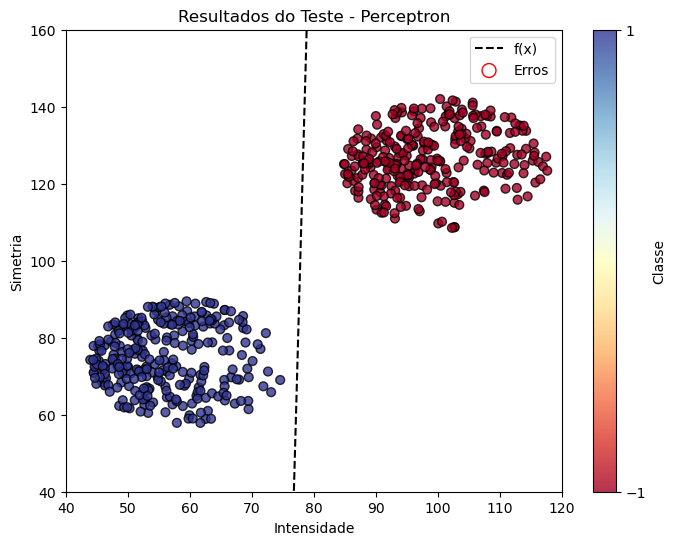

In [27]:
plot_decision_boundary(X_test, y_test, y_pred, w, 
                       title="Resultados do Teste - Perceptron", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))

## ➞ Regressão Linear

### Treinamento e Avaliação do Modelo

- **Criação e Treinamento do Modelo**: Uma instância da classe `LinearRegression` é criada e treinada usando o método `fit` com o conjunto de dados `X_train` e `y_train`.
- **Fazendo Previsões**: Após o treinamento, o método `predict` é usado para gerar previsões sobre o conjunto de dados de teste `X_test`.
- **Conversão das Previsões**: As previsões contínuas são convertidas em categorias binárias usando uma limitação (se a previsão for maior que 0, a classe é 1; caso contrário, é -1).
- **Avaliação do Desempenho**: Calcula a matriz de confusão e o relatório de classificação para avaliar a precisão do modelo.

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Fazer previsões nos dados de teste
lr_test_predictions = lr.predict(X_test)
y_pred_lr = np.where(lr_test_predictions > 0, 1, -1) # Convertendo previsões contínuas em categorias

Pesos do modelo: [ 3.58751288 -0.01875499 -0.02111635]
Resultados do Teste:

Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

   Classe -1       1.00      1.00      1.00       291
    Classe 1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



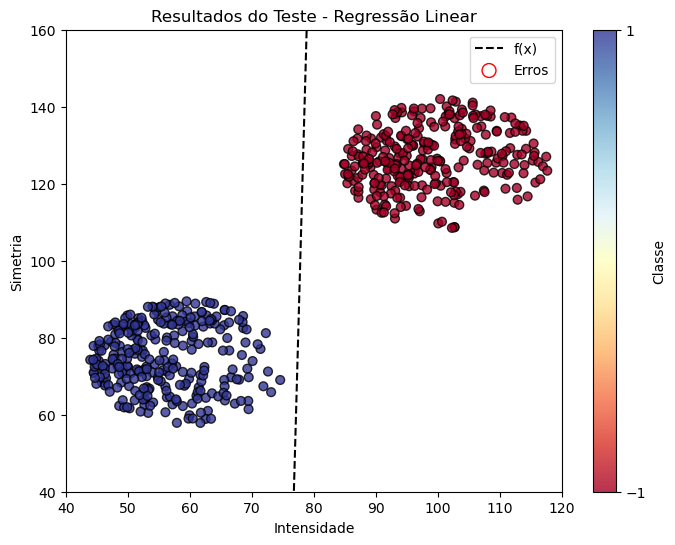

In [29]:
# Avaliar o desempenho no conjunto de teste
lr_test_conf_matrix = confusion_matrix(y_test, y_pred_lr)
lr_test_class_report = classification_report(y_test, y_pred_lr, target_names=['Classe -1', 'Classe 1'])

# Exibir resultados do teste
print("Pesos do modelo:", lr.getW())
print("Resultados do Teste:")
print(f"\nMatriz de Confusão (Teste):\n {lr_test_conf_matrix}")
print(f"\nRelatório de Classificação (Teste):\n{lr_test_class_report}")

# Plotar resultados do teste
plot_decision_boundary(X_test, y_test, y_pred_lr, w, 
                       title="Resultados do Teste - Regressão Linear", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))

## ➞ Regressão Logística

### 1. Normalização dos Dados

Antes de ajustar o modelo de regressão logística, os dados são normalizados. A normalização é feita subtraindo a média e dividindo pelo desvio padrão de cada característica. Isso é feito para garantir que todas as características tenham a mesma escala e contribuir igualmente para o modelo.

A fórmula para a normalização é:

$$
X_{\text{norm}} = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$

onde $\text{mean}(X)$ é a média das características e $\text{std}(X)$ é o desvio padrão.

In [30]:
'''Na atividade pratica tambem normaliza os dados'''
import numpy.linalg as LA

def normalizar_manual(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train_norm = normalizar_manual(X_train)
X_test_norm = normalizar_manual(X_test)


X_test_bias = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

## 2. Treinamento e Avaliação

- **Treinamento do Modelo**: O modelo é ajustado usando o método `fit` com os dados normalizados.
- **Predições**: As previsões são feitas no conjunto de dados de teste usando o método `predict`.

A matriz de confusão e o relatório de classificação são utilizados para avaliar o desempenho do modelo. A matriz de confusão compara as previsões com os rótulos verdadeiros, e o relatório de classificação fornece métricas detalhadas como precisão, recall e F1-score para cada classe.

In [31]:
# Executa o ajuste dos dados com Regressão Logística
rlog = LogisticRegression(eta=0.001, tmax=1500) #Diminui a eta (taxa de aprendizado) pois estava dando overfitting e por isso tava classificando errado
rlog.fit(X_train_norm, y_train)


y_pred_rlog = rlog.predict(X_test_bias)


conf_matrix_reg_log = confusion_matrix(y_test, y_pred_rlog)
class_report_reg_log = classification_report(y_test, y_pred_rlog, target_names=['5', '1'])

print(f"\nMatriz de Confusão (Teste):\n {conf_matrix_reg_log}")
print(f"\nRelatório de Classificação (Teste):\n{class_report_reg_log}")

errorIN = np.mean(y_pred_rlog != y_test) * 100
print(f"Error in: {errorIN:.2f}%")


Matriz de Confusão (Teste):
 [[291   0]
 [  0 292]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

Error in: 0.00%


Pesos do modelo: [-0.63585313 -1.07635206 -1.09529826]


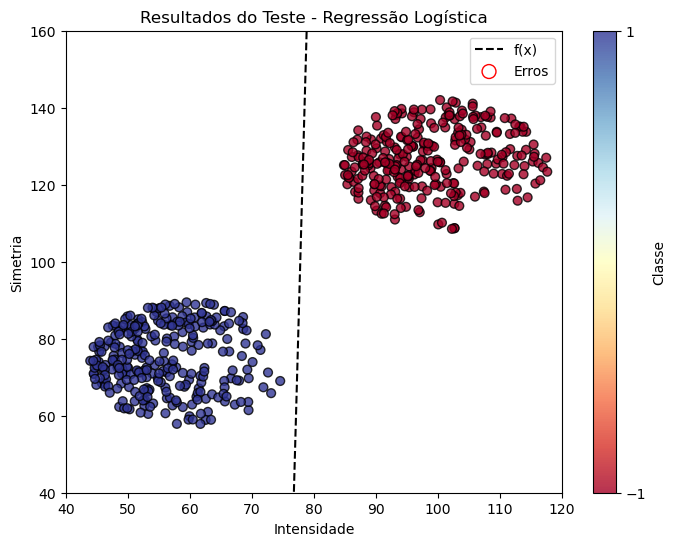

In [32]:
print("Pesos do modelo:", rlog.getW())

# Plotar resultados do teste
plot_decision_boundary(X_test, y_test, y_pred_rlog, w, 
                       title="Resultados do Teste - Regressão Logística", 
                       xlabel="Intensidade", 
                       ylabel="Simetria", 
                       color_ticks=[-1, 1], 
                       color_label="Classe",
                       xlim=(40, 120), 
                       ylim=(40, 160))